In [40]:
import datetime
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math

matplotlib.rcParams['figure.figsize'] = [9, 6]
%matplotlib notebook


def project_xy(angle:float, length:float):
    return math.cos(angle) * length, math.sin(angle) * length

def angle_length(x:float, y:float):
    length = math.sqrt(x**2 + y**2)
    if length == 0:
        return 0,0
    angle = math.atan2(y/length,x/length)
    return angle, length

def v_length(x,y):
    return math.sqrt(x**2 + y**2)

In [45]:
class World(object):
    
    def __init__(self):
        self.MAX_TURN_RATE_HOUR = math.radians(120) * 60  # max 120 degrees per minute, 360 in 3 minutes
        self.MAX_DEEP_RATE_FEET = 1  # 1 foot per second
        self.MAX_SPEED = 36.0  # Knots or nautical mile per hour
        self.MAX_ACCELERATION = 0.1 * 3600  # acceleration in knots/hour^2 -> imax acceleration 2 Knots / second^2
        self.DRAG_FACTOR = 1.0 * self.MAX_ACCELERATION / (self.MAX_SPEED ** 2)
        
        # turbines 35,000 hp (26 MW), 1 auxiliary motor 325 hp (242 kW)
        self.turbine_level = 50.0 # from -100% to +100%
        self.drag_factor = 0.0
        self.drag = 0.0
        self.drag_x = 0.0
        self.drag_y = 0.0
        self.ship_bearing = 0.0  # the angle of the ship is rotated in relation to north, in radians
        self.speed = 0.0 # knots
        self.acceleration_angle = 0.0
        self.acceleration = 0.0 
        self.acceleration_x = 0.0
        self.acceleration_y = 0.0
        self.speed_x = 0.0 # 
        self.speed_y = 0.0 # 
        self.position_x = 0.0
        self.position_y = 0.0
        self.time = datetime.datetime(2022,1,1,0,0,0)
        
        # moving_direction: the direction the ship is moving in relation to north, in radians
        self.moving_direction, self.speed = angle_length(self.speed_x, self.speed_y)


        
        self.rudder = 0 # rudder in radians per minute

    
    def turn(self, time_elapsed:float):
        self.time = self.time + datetime.timedelta(seconds=time_elapsed*3600)
        self.turbine_acc = self.MAX_ACCELERATION * self.turbine_level / 100
#         self.turbine_acc_x, self.turbine_acc_y = project_xy(world.ship_bearing, self.turbine_acc)

        if world.rudder != 0:
            # diff is the difference between the angle the sub is mov ing and the angle of the ship is bearing
            # meaning the ship the turning left or right
            diff = (world.rudder * time_elapsed * self.speed)
            self.acceleration_angle = self.ship_bearing - diff
            self.drag_factor = self.DRAG_FACTOR * (1 + abs(500 * math.sin(diff)))
        else:
            self.acceleration_angle = self.ship_bearing
            self.drag_factor = self.DRAG_FACTOR
            

        #     diff = self.course - world.ship_bearing

        #     # correction if the drag factor since the sub is making a turn
        self.drag_factor = self.DRAG_FACTOR # * (1 + abs(500 * math.sin(diff)))

        # drag force
        self.drag = self.drag_factor * (self.speed ** 2)

        self.acceleration = self.turbine_acc # - self.total_drag
        
        # calculates all forces that actuates in the ship
    
        # turbine accelerates in direction the ship in bearing
        self.acceleration_x, self.acceleration_y = project_xy(self.acceleration_angle, self.acceleration)
        
        # drags accelerates against the current movement
        self.drag_x, self.drag_y = project_xy(self.moving_direction, -1.0 * self.drag)
        
        # updates speed and position
        self.speed_x += (self.acceleration_x + self.drag_x) * time_elapsed #
        self.speed_y += (self.acceleration_y * self.drag_y) * time_elapsed #
        self.moving_direction, self.speed = angle_length(self.speed_x, self.speed_y)
        self.position_x += (self.speed_x * time_elapsed) #
        self.position_y += (self.speed_y * time_elapsed) #
        

        
    def debug_pos(self):
        return f'{self.time.strftime("%H:%m:%S")} t_level: {self.turbine_level:0.2f} t_acc:{self.turbine_acc:0.2f} drag:{self.drag:0.2f}({self.drag_x:0.2f},{self.drag_y:0.2f}) acc:{self.acceleration:0.2f} speed:{self.speed:0.2f} pos:({self.position_x:0.2f},{self.position_y:0.2f})'

In [46]:
world = World()

for i in range(1000):
    
    world.turn(1/3600)
    print(world.debug_pos())



00:01:01 t_level: 50.00 t_acc:180.00 drag:0.00(-0.00,-0.00) acc:180.00 speed:0.05 pos:(0.00,0.00)
00:01:02 t_level: 50.00 t_acc:180.00 drag:0.00(-0.00,-0.00) acc:180.00 speed:0.10 pos:(0.00,0.00)
00:01:03 t_level: 50.00 t_acc:180.00 drag:0.00(-0.00,-0.00) acc:180.00 speed:0.15 pos:(0.00,0.00)
00:01:04 t_level: 50.00 t_acc:180.00 drag:0.01(-0.01,-0.00) acc:180.00 speed:0.20 pos:(0.00,0.00)
00:01:05 t_level: 50.00 t_acc:180.00 drag:0.01(-0.01,-0.00) acc:180.00 speed:0.25 pos:(0.00,0.00)
00:01:06 t_level: 50.00 t_acc:180.00 drag:0.02(-0.02,-0.00) acc:180.00 speed:0.30 pos:(0.00,0.00)
00:01:07 t_level: 50.00 t_acc:180.00 drag:0.02(-0.02,-0.00) acc:180.00 speed:0.35 pos:(0.00,0.00)
00:01:08 t_level: 50.00 t_acc:180.00 drag:0.03(-0.03,-0.00) acc:180.00 speed:0.40 pos:(0.00,0.00)
00:01:09 t_level: 50.00 t_acc:180.00 drag:0.04(-0.04,-0.00) acc:180.00 speed:0.45 pos:(0.00,0.00)
00:01:10 t_level: 50.00 t_acc:180.00 drag:0.06(-0.06,-0.00) acc:180.00 speed:0.50 pos:(0.00,0.00)
00:01:11 t_level: 50

<IPython.core.display.Javascript object>


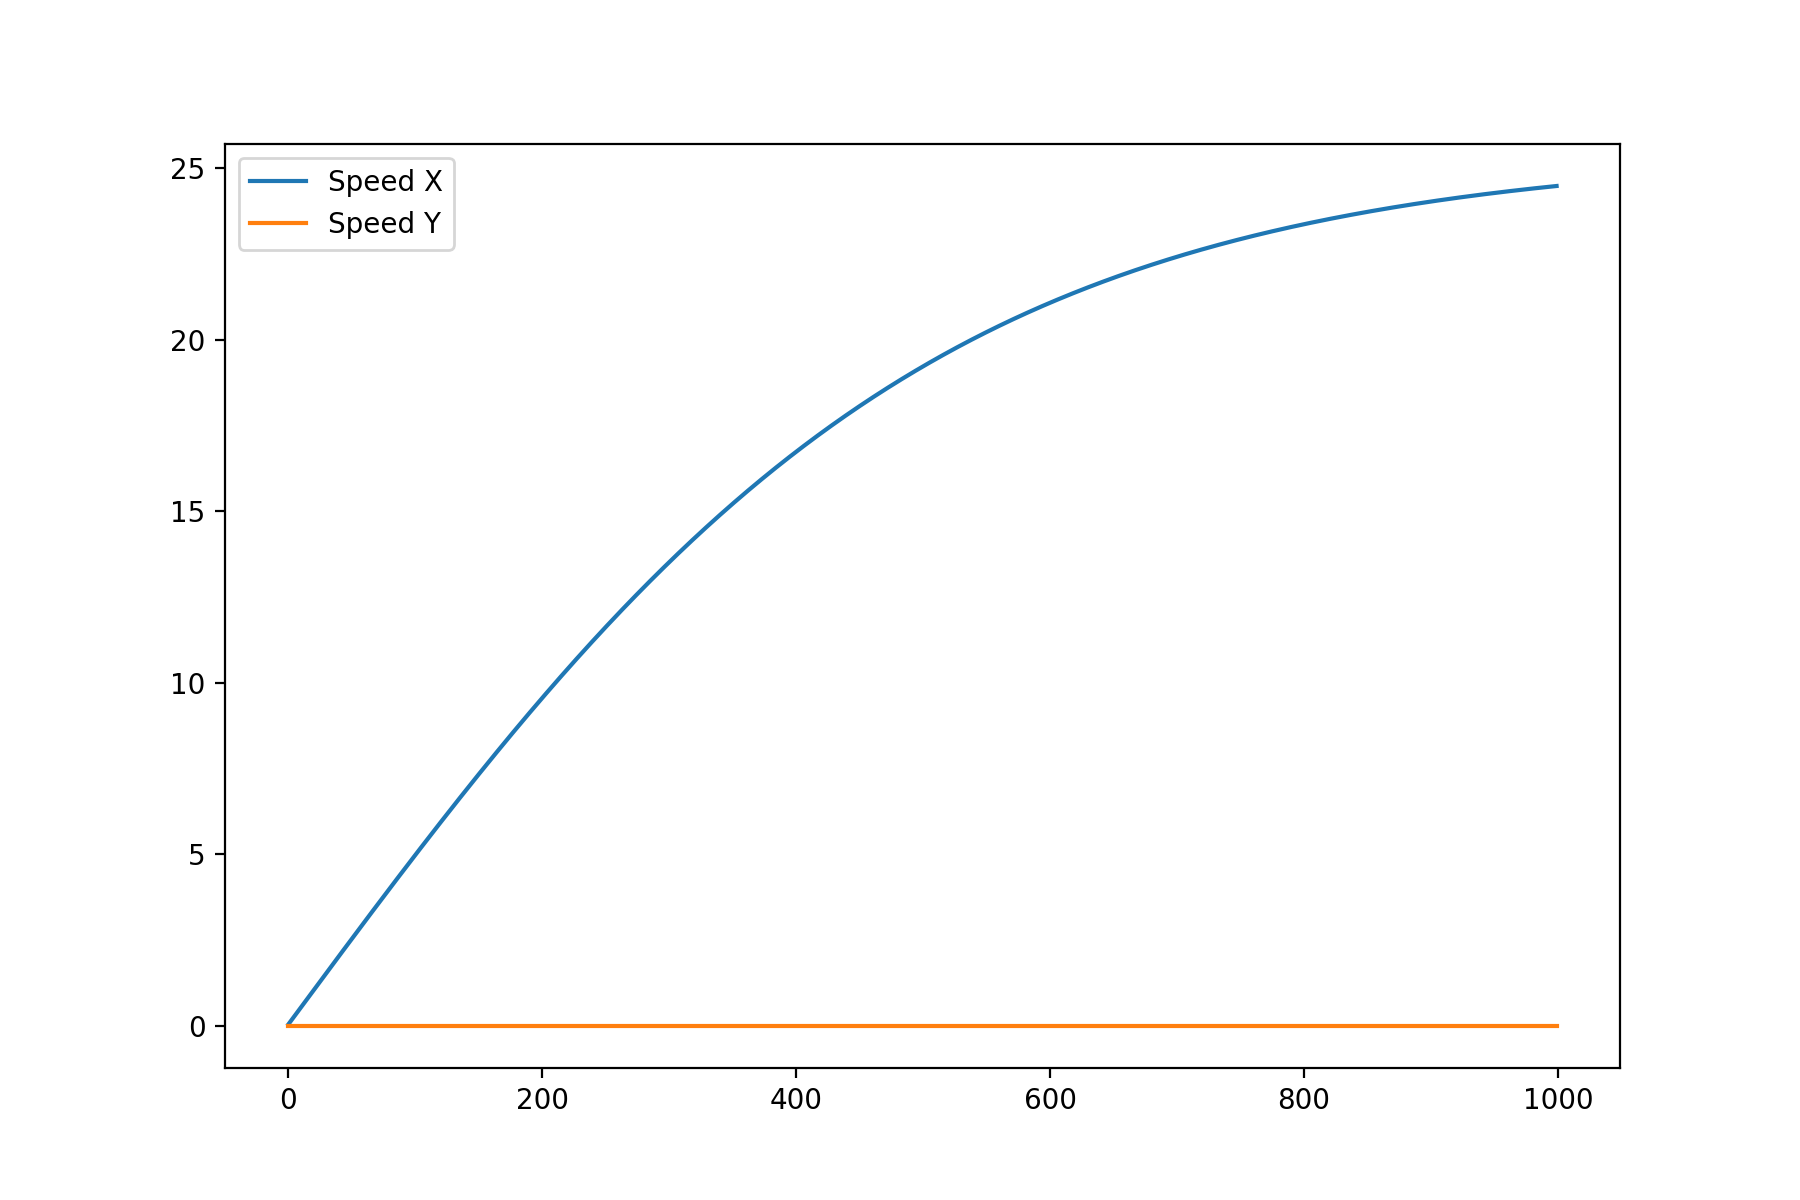

In [47]:

world = World()

world.rudder = 2.0

x = []
speed_x = []
speed_y = []
for i in range(1000):
    x.append(i)
    world.turn(1/3600)
    speed_x.append(world.speed_x)
    speed_y.append(world.speed_y)
#     print(world.debug_pos())
    
plt.plot(x, speed_x, label='Speed X')
plt.plot(x, speed_y, label='Speed Y')
# plt.title('Inputs')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


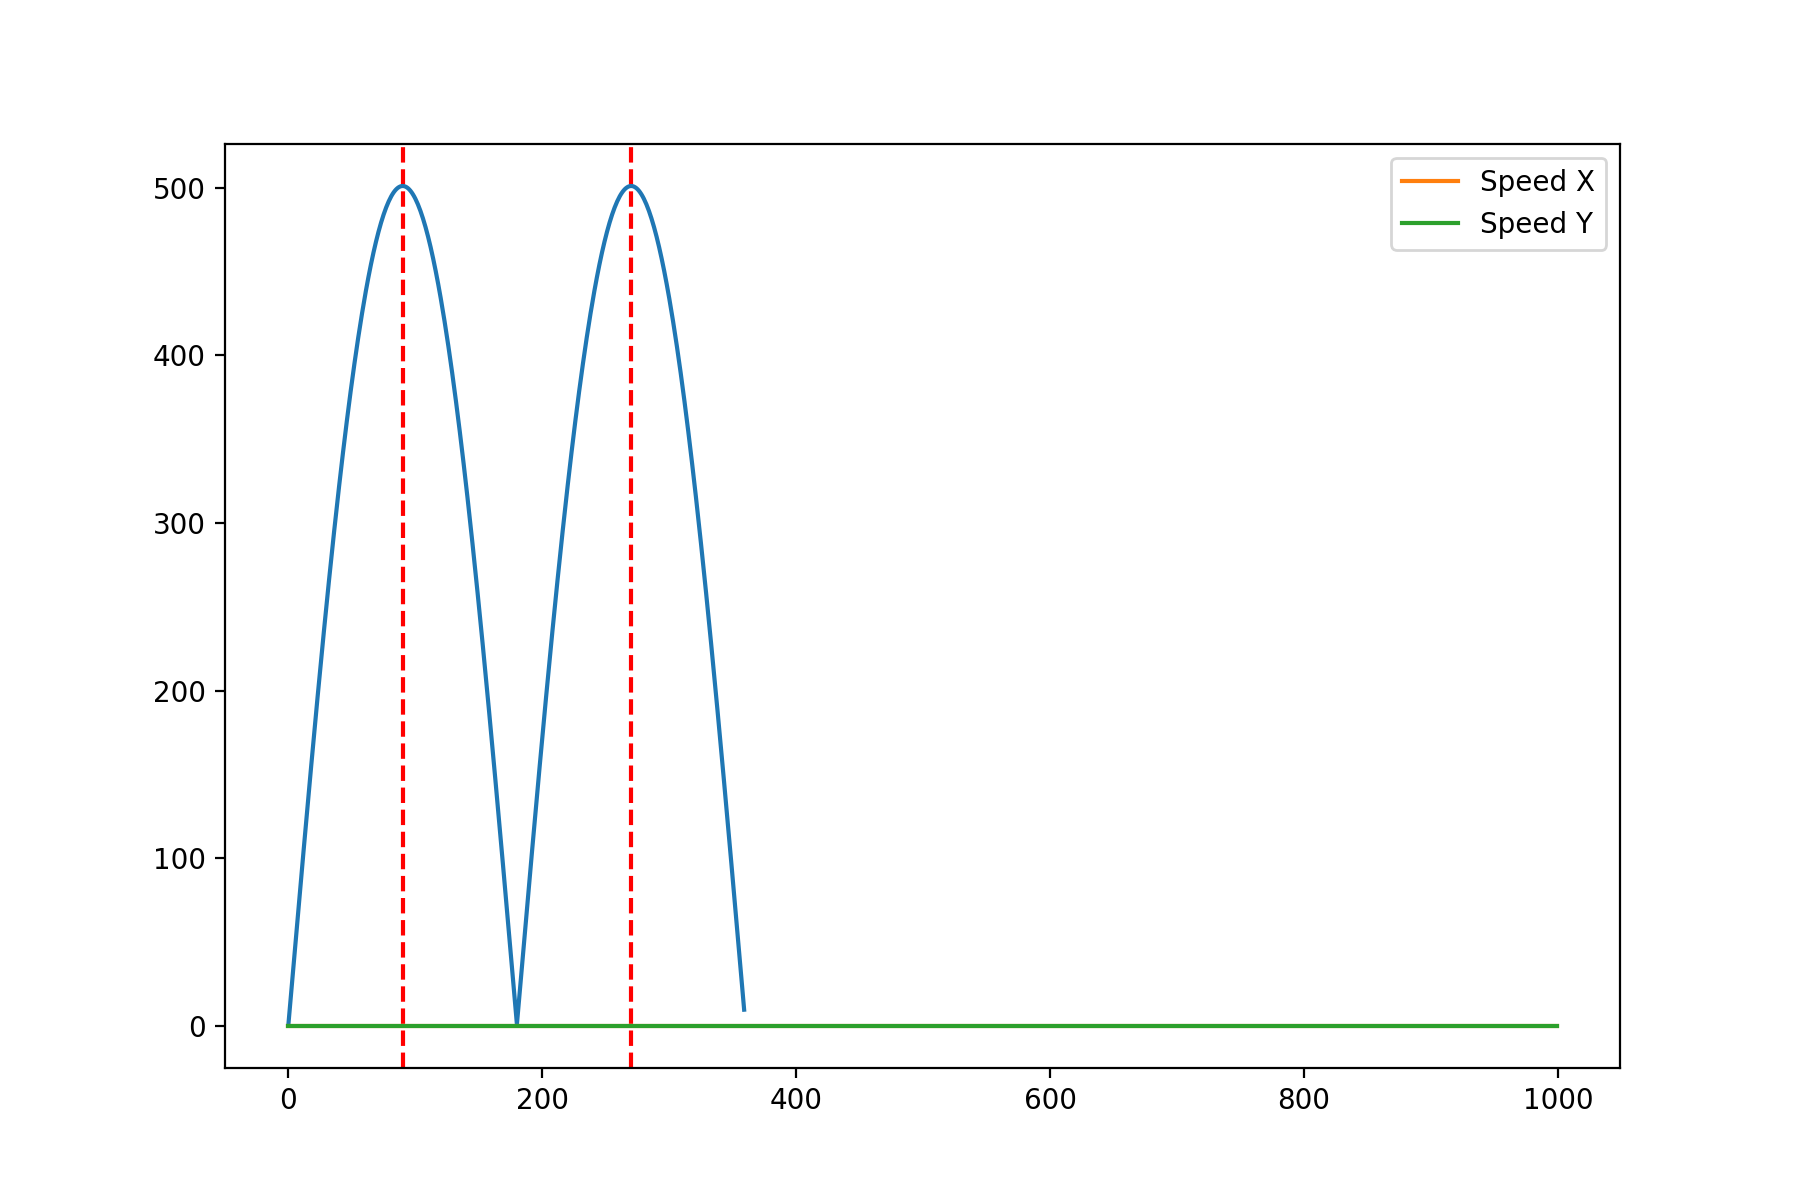

In [26]:

values = []
x = []
for i in range(360):
    x.append(i)
    f = (1 + abs(500 * math.sin(math.radians(i))))
#     print(f'angle :{i:0.5f}  f: {f:0.5f}')
    values.append(f)
    
    
# x = np.linspace(1, 100, len(positions))
plt.axvline(x = 90, color = 'r', linestyle = '--')
plt.axvline(x = 270, color = 'r', linestyle = '--')
plt.plot(x, values)
# plt.title('Inputs')
plt.show()

In [36]:
power = 10
angle = math.radians(30.0)
print(angle,power)

x, y = project_xy(angle, power)
print(x,y)

a, p = angle_length(x,y)
print(a,p)

0.5235987755982988 10
8.660254037844387 4.999999999999999
0.5235987755982987 10.0
